# 📊 Redução de Dimensionalidade no MNIST

## 🎯 Objetivo
Reduzir as 784 features (28x28 pixels) do dataset MNIST para apenas **2 características principais**:

- **Intensidade**  
- **Simetria (vertical + horizontal)**

Essa redução permite trabalhar com modelos de Aprendizado de Máquina mais simples, sem perder informações relevantes para distinguir os dígitos.

---

## 🖼️ Intensidade

A **intensidade** mede a quantidade de pixels escuros na imagem.  
É calculada pela soma dos valores dos pixels dividida por 255:

$$
I = \frac{\sum_{i=0}^{27} \sum_{j=0}^{27} pix_{i,j}}{255}
$$

Quanto maior o valor, mais preenchida a imagem (ex.: dígito 0 tende a ter intensidade maior que o dígito 1).

---

## 🔍 Simetria

A **simetria** é calculada comparando a imagem com sua reflexão.

### Simetria Vertical (Sv)
Compara pixels da metade esquerda com os da metade direita, linha a linha:

$$
S_v = \frac{\sum_{i=0}^{27} \sum_{j=0}^{13} \left| pix_{i,j} - pix_{i,27-j} \right|}{255}
$$

### Simetria Horizontal (Sh)
Compara pixels da metade superior com os da metade inferior, coluna a coluna:

$$
S_h = \frac{\sum_{i=0}^{13} \sum_{j=0}^{27} \left| pix_{i,j} - pix_{27-i,j} \right|}{255}
$$

### Simetria Total
$$
S = S_v + S_h
$$

- **Quanto mais próximo de 0, mais simétrica a imagem.**
- Valores maiores indicam maior assimetria.

---

## 📂 Construção dos Novos Arquivos

Foram gerados novos arquivos CSV contendo apenas as 3 colunas relevantes:

- **label** → o dígito real  
- **intensidade** → nível de preenchimento da imagem  
- **simetria** → medida de quão simétrica é a imagem  

```python
reduzir_dataset('mnist_train.csv', 'train_redu.csv')
reduzir_dataset('mnist_test.csv', 'test_redu.csv')


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('dataset/mnist_train.csv')

df_test = pd.read_csv('dataset/mnist_test.csv')

In [3]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### função para calcular intensidade de cada imagem

In [5]:
def intensidade(img):
    img_2d = img.reshape(28, 28)
    return np.sum(img_2d) / 255

### funçao para calcular simetria

In [6]:
def simetria(img):
    img_2d = img.reshape(28, 28)
    # Simetria vertical
    sv = np.sum(np.abs(img_2d[:, :14] - np.fliplr(img_2d[:, 14:]))) / 255
    # Simetria horizontal
    sh = np.sum(np.abs(img_2d[:14, :] - np.flipud(img_2d[14:, :]))) / 255
    
    return 1 / (sv + sh) * 100 # fiz essa divisão para seguir a logica de quanto mais simetrico, mais proximo de 0

In [18]:
# Separando as colunas 

In [7]:
X = df_train.drop(columns=['label']).values
y = df_train['label'].values



print(X)

print("Valores de y:")
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Valores de y:
[5 0 4 ... 5 6 8]


In [8]:
def reduzir_dataset(csv_in, csv_out):
    df = pd.read_csv(csv_in)
    y = df['label'].values
    X = df.drop(columns=['label']).values

    X_reduzido = np.array([[intensidade(x), simetria(x)] for x in X])

    df_reduzido = pd.DataFrame({
        'label': y,
        'intensidade': X_reduzido[:,0],
        'simetria': X_reduzido[:,1]
    })

    df_reduzido.to_csv(csv_out, index=False)

In [9]:
reduzir_dataset('dataset/mnist_train.csv', 'train_redu.csv')
reduzir_dataset('dataset/mnist_test.csv', 'test_redu.csv')

In [12]:
dfresu = pd.read_csv('dataset/dataset_redu/train_redu.csv')

In [13]:
dfresu

,label,intensidade,simetria
0,5,107.941176,0.715328
1,0,121.941176,0.619534
2,4,76.247059,0.865933
3,1,67.196078,0.863412
4,9,91.035294,0.890612
...,...,...,...
59995,8,101.184314,0.682219
59996,3,107.000000,0.775878
59997,5,86.792157,0.716453
59998,6,80.109804,0.781298


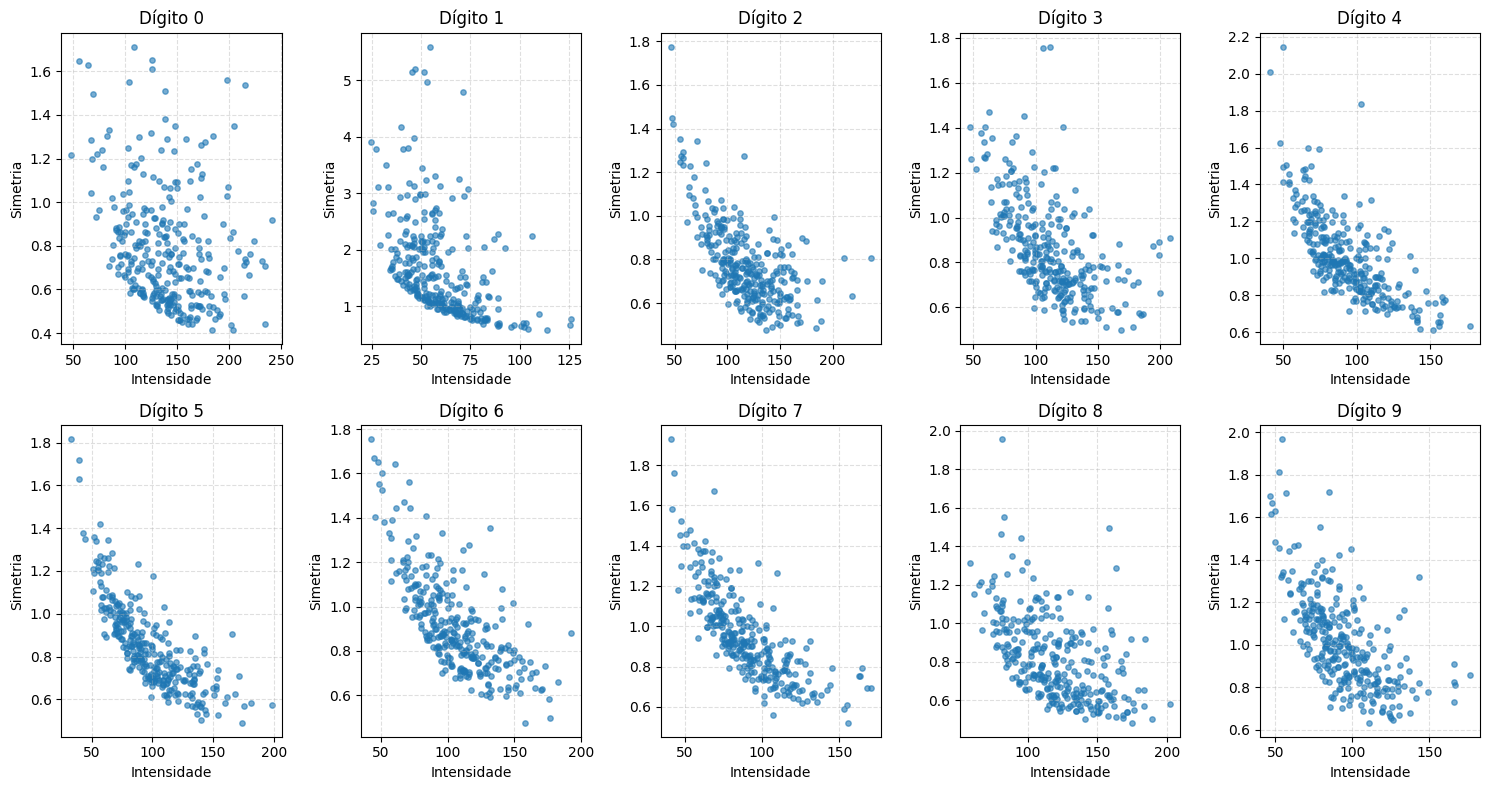

In [14]:
df = dfresu

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for digito, ax in zip(sorted(df['label'].unique()), axes):
    subset = df[df['label'] == digito].sample(300, random_state=42)  # limitar p/ não poluir
    
    ax.scatter(subset['intensidade'], subset['simetria'], 
               alpha=0.6, s=15, c="tab:blue")
    

    
    ax.set_title(f'Dígito {digito}')
    ax.set_xlabel('Intensidade')
    ax.set_ylabel('Simetria')
    ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()